# PROBLEM STATEMENT:

As per reports Cars growth of new cars in the upcoming 5 years is an average of 3.5% while for used cars 5% and the ratio of used cars to new cars is increasing continuously. So the used cars market is increasing day by day and a consumer wants the best resale price of his car.

Problem Statement
Currently, if anyone wants to sell their car either they have to take their car to a respective company workshop or have to make an appointment for the company to get an estimate of the price. This process involves a lot of time and resources. Our Objective is to make a model for third-party companies that will make an estimate of the Price of the customer’s car directly from their online portal. This will save customers time and help the company to reduce its cost and also streamline the process of selling used cars.

Task that we have to perform 
📌Clean and preprocess the data
📌 Do Exploratory Data Analysis (EDA) to get some insight into data
📌 Do Feature Engineering
📌 Build a model i.e Regression Analysis
📌 Evaluate the model
📌 Go back to any of the previous steps unless the result is sufficient.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Datasets

In [2]:
df=pd.read_csv(r"cars_data.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,0,0.0,2016,Datsun,Go T,3 Lakhs,Noida,"18,000 Kms",Petrol,Hatchback,1st Owner
1,1,1.0,2012,Volkswagen,Polo COMFORTLINE 1.2...,3 Lakhs,Delhi,"77,366 Kms",Diesel,Hatchback,1st Owner
2,2,2.0,2012,Hyundai,I10 MAGNA 1.1 IRDE2,3 Lakhs,Ghaziabad,"55,343 Kms",Petrol,Hatchback,1st Owner
3,3,3.0,2014,Toyota,Etios Liva V,3 Lakhs,Faridabad,"80,530 Kms",Diesel,Hatchback,1st Owner
4,4,4.0,2011,Chevrolet,Cruze LT,3 Lakhs,Delhi,"55,982 Kms",Diesel,Sedan,2nd Owner


# Exploratory Data Analysis (EDA)

In [3]:
#Checking shape of datasets as we are getting there are 3635 rows and 11 columns.
df.shape

(3635, 11)

In [4]:
#Total Columns Names
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Year of Car', 'Make of Car', 'Model',
       'Price of Car', 'Location of Car', 'Kilometers', 'Diseal/Petrol',
       'Body', 'Owner'],
      dtype='object')

In [5]:
df['Unnamed: 0'].unique()

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.003e+03, 1.004e+03,
             nan])

In [6]:
df['Year of Car'].unique()

array([2016, 2012, 2014, 2011, 2013, 2015, 2019, 2017, 2020, 2018, 2009,
       2008, 2007, 2010, 2021, 2006, 2004, 2005, 2003, 2002, 2000, 1999,
       1996], dtype=int64)

In [7]:
df['Make of Car'].unique()

array(['Datsun', 'Volkswagen', 'Hyundai', 'Toyota', 'Chevrolet',
       'Renault', 'Nissan', 'Mahindra', 'Maruti Suzuki', 'Honda', 'Tata',
       'Ford', 'Skoda', 'Mitsubishi', 'Ssangyong', 'BMW', 'Jeep', 'Mg',
       'Mercedes Benz', 'Kia', 'Audi', 'Fiat', 'Landrover', 'Volvo',
       'Mahindra Renault'], dtype=object)

In [8]:
df['Price of Car'].unique()

array(['3 Lakhs', '2 Lakhs', '3.25 Lakhs', '3.3 Lakhs', '3.5 Lakhs',
       '15 Lakhs', '8 Lakhs', '5.5 Lakhs', '6.5 Lakhs', '4.95 Lakhs',
       '3.75 Lakhs', '3.8 Lakhs', '3.99 Lakhs', '4.25 Lakhs', '4.5 Lakhs',
       '4.75 Lakhs', '4.85 Lakhs', '3.85 Lakhs', '4 Lakhs', '4.35 Lakhs',
       '4.55 Lakhs', '4.6 Lakhs', '4.65 Lakhs', '4.68 Lakhs', '4.7 Lakhs',
       '5 Lakhs', '5.15 Lakhs', '5.2 Lakhs', '5.25 Lakhs', '5.35 Lakhs',
       '5.49 Lakhs', '5.6 Lakhs', '5.7 Lakhs', '5.75 Lakhs', '5.85 Lakhs',
       '5.95 Lakhs', '6 Lakhs', '6.15 Lakhs', '6.25 Lakhs', '6.65 Lakhs',
       '6.75 Lakhs', '6.85 Lakhs', '6.9 Lakhs', '6.95 Lakhs',
       '7.15 Lakhs', '7.25 Lakhs', '7.45 Lakhs', '7.49 Lakhs',
       '7.5 Lakhs', '7.8 Lakhs', '7.9 Lakhs', '2.75 Lakhs', '2.4 Lakhs',
       '1.45 Lakhs', '7.95 Lakhs', '27 Lakhs', '5.9 Lakhs', '2.9 Lakhs',
       '5.1 Lakhs', '9 Lakhs', '8.25 Lakhs', '1.65 Lakhs', '2.45 Lakhs',
       '6.45 Lakhs', '6.28 Lakhs', '2.99 Lakhs', '9.25 Lakhs', '37,500'

In [9]:
df['Location of Car'].unique()

array(['Noida', 'Delhi', 'Ghaziabad', 'Faridabad', 'Gurgaon', 'Mumbai',
       'Thane', 'Panvel', 'Vasai', 'Navi Mumbai', 'Virar', 'Kalyan',
       'Bangalore', 'Tumkur', 'Bhopal', 'Indore', 'Surat', 'Pune',
       'Nashik', 'Kottayam', 'Kollam', 'Thiruvananthapuram', 'Trivandrum',
       'Vikasnagar', 'Dehradun', 'Jaipur', 'Kota', 'Amritsar',
       'Tarn Taran', 'Zirakpur', 'Chandigarh', 'Mohali', 'Gorakhpur',
       'Coimbatore', 'Chennai', 'Hosur', 'Meerut'], dtype=object)

In [10]:
df['Kilometers'].unique()

array(['18,000 Kms', '77,366 Kms', '55,343 Kms', ..., '41,094 Kms',
       '9,500 Kms', '1.5 Lakhs Kms'], dtype=object)

In [11]:
df['Diseal/Petrol'].unique()

array(['Petrol', 'Diesel',
       'Petrol\n                                        +  CNG Kit',
       'CNG\n                                        +  CNG Kit', 'CNG',
       'Electric', 'LPG',
       'Petrol                                    \n+ CNG Kit',
       'CNG                                    \n+ CNG Kit',
       'LPG\n                                        +  CNG Kit'],
      dtype=object)

In [12]:
df['Body'].unique()

array(['Hatchback', 'Sedan', 'SUV', 'MUV', 'MPV', 'CompactSUV', 'Van',
       '--', 'Saloon', nan, 'Coupe', 'Compact SUV'], dtype=object)

In [13]:
df['Owner'].unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '--'],
      dtype=object)

Checking All features Unique values and trying to analyse how features looking.

In [14]:
#Checking data types of all features. As we know All features is object data types except "Year of Car".
df.dtypes

Unnamed: 0.1         int64
Unnamed: 0         float64
Year of Car          int64
Make of Car         object
Model               object
Price of Car        object
Location of Car     object
Kilometers          object
Diseal/Petrol       object
Body                object
Owner               object
dtype: object

In [15]:
#Here we are droping two columns which are not usefull to our data.
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [16]:
df.head()

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,2016,Datsun,Go T,3 Lakhs,Noida,"18,000 Kms",Petrol,Hatchback,1st Owner
1,2012,Volkswagen,Polo COMFORTLINE 1.2...,3 Lakhs,Delhi,"77,366 Kms",Diesel,Hatchback,1st Owner
2,2012,Hyundai,I10 MAGNA 1.1 IRDE2,3 Lakhs,Ghaziabad,"55,343 Kms",Petrol,Hatchback,1st Owner
3,2014,Toyota,Etios Liva V,3 Lakhs,Faridabad,"80,530 Kms",Diesel,Hatchback,1st Owner
4,2011,Chevrolet,Cruze LT,3 Lakhs,Delhi,"55,982 Kms",Diesel,Sedan,2nd Owner


# Data Cleaning

In [17]:

Year=df['Year of Car'].median()
Year

2015.0

In [18]:

df['Year of Car']=df['Year of Car'].apply(lambda x: x if x!=0 else Year)

In [19]:
df.head()

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,2016,Datsun,Go T,3 Lakhs,Noida,"18,000 Kms",Petrol,Hatchback,1st Owner
1,2012,Volkswagen,Polo COMFORTLINE 1.2...,3 Lakhs,Delhi,"77,366 Kms",Diesel,Hatchback,1st Owner
2,2012,Hyundai,I10 MAGNA 1.1 IRDE2,3 Lakhs,Ghaziabad,"55,343 Kms",Petrol,Hatchback,1st Owner
3,2014,Toyota,Etios Liva V,3 Lakhs,Faridabad,"80,530 Kms",Diesel,Hatchback,1st Owner
4,2011,Chevrolet,Cruze LT,3 Lakhs,Delhi,"55,982 Kms",Diesel,Sedan,2nd Owner


In [20]:
df['Kilometers']=df['Kilometers'].apply(lambda x: x.replace(',','') if x!='-' else '-')

In [21]:
df.head()

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,2016,Datsun,Go T,3 Lakhs,Noida,18000 Kms,Petrol,Hatchback,1st Owner
1,2012,Volkswagen,Polo COMFORTLINE 1.2...,3 Lakhs,Delhi,77366 Kms,Diesel,Hatchback,1st Owner
2,2012,Hyundai,I10 MAGNA 1.1 IRDE2,3 Lakhs,Ghaziabad,55343 Kms,Petrol,Hatchback,1st Owner
3,2014,Toyota,Etios Liva V,3 Lakhs,Faridabad,80530 Kms,Diesel,Hatchback,1st Owner
4,2011,Chevrolet,Cruze LT,3 Lakhs,Delhi,55982 Kms,Diesel,Sedan,2nd Owner


In [22]:
int(float('1.37'))

1

In [23]:
df['Owner']=df['Owner'].apply(lambda x: int(x[0]) if x!='--' else 2)

In [24]:
df.head()

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,2016,Datsun,Go T,3 Lakhs,Noida,18000 Kms,Petrol,Hatchback,1
1,2012,Volkswagen,Polo COMFORTLINE 1.2...,3 Lakhs,Delhi,77366 Kms,Diesel,Hatchback,1
2,2012,Hyundai,I10 MAGNA 1.1 IRDE2,3 Lakhs,Ghaziabad,55343 Kms,Petrol,Hatchback,1
3,2014,Toyota,Etios Liva V,3 Lakhs,Faridabad,80530 Kms,Diesel,Hatchback,1
4,2011,Chevrolet,Cruze LT,3 Lakhs,Delhi,55982 Kms,Diesel,Sedan,2


In [25]:
df['Owner'].unique()

array([1, 2, 3, 4], dtype=int64)

In [26]:
df

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,2016,Datsun,Go T,3 Lakhs,Noida,18000 Kms,Petrol,Hatchback,1
1,2012,Volkswagen,Polo COMFORTLINE 1.2...,3 Lakhs,Delhi,77366 Kms,Diesel,Hatchback,1
2,2012,Hyundai,I10 MAGNA 1.1 IRDE2,3 Lakhs,Ghaziabad,55343 Kms,Petrol,Hatchback,1
3,2014,Toyota,Etios Liva V,3 Lakhs,Faridabad,80530 Kms,Diesel,Hatchback,1
4,2011,Chevrolet,Cruze LT,3 Lakhs,Delhi,55982 Kms,Diesel,Sedan,2
...,...,...,...,...,...,...,...,...,...
3630,2019,Mahindra,Scorpio S5 2WD,12.25 Lakhs,Meerut,35000 Kms,Diesel,SUV,1
3631,2016,Mahindra,Scorpio S10,9.5 Lakhs,Meerut,50000 Kms,Diesel,SUV,3
3632,2018,Hyundai,Elite I20 MAGNA EXEC...,5.5 Lakhs,Meerut,47000 Kms,Petrol,Hatchback,1
3633,2017,Renault,Kwid RXL,2.5 Lakhs,Meerut,55000 Kms,Petrol,Hatchback,2


In [27]:
df['Price of Car'] = df['Price of Car'].str[0:3]

In [28]:
df['Kilometers'] = df['Kilometers'].str[0:5]

In [29]:
df.tail(10)

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
3625,2016,Mahindra,Xuv500 W8,7.2,Meerut,65000,Diesel,SUV,2
3626,2013,Mahindra,Scorpio VLX 2WD BS I...,3.5,Meerut,1.25,Diesel,SUV,1
3627,2017,Datsun,Redi Go 1.0 S,2.5,Meerut,48000,Petrol,Hatchback,2
3628,2019,Mahindra,Scorpio S7 140 2WD,12.,Meerut,9500,Diesel,SUV,1
3629,2018,Mahindra,Marazzo M8 7 STR,6 L,Meerut,21000,Diesel,MPV,1
3630,2019,Mahindra,Scorpio S5 2WD,12.,Meerut,35000,Diesel,SUV,1
3631,2016,Mahindra,Scorpio S10,9.5,Meerut,50000,Diesel,SUV,3
3632,2018,Hyundai,Elite I20 MAGNA EXEC...,5.5,Meerut,47000,Petrol,Hatchback,1
3633,2017,Renault,Kwid RXL,2.5,Meerut,55000,Petrol,Hatchback,2
3634,2011,Maruti Suzuki,Eeco 5 STR CNG WITH ...,1.5,Meerut,1.5 L,CNG \n+ CNG...,Van,3


In [30]:
df['Body'] = df['Body'].replace(['--'],'NaN')

In [31]:
df['Diseal/Petrol'].unique()

array(['Petrol', 'Diesel',
       'Petrol\n                                        +  CNG Kit',
       'CNG\n                                        +  CNG Kit', 'CNG',
       'Electric', 'LPG',
       'Petrol                                    \n+ CNG Kit',
       'CNG                                    \n+ CNG Kit',
       'LPG\n                                        +  CNG Kit'],
      dtype=object)

In [32]:
df['Diseal/Petrol'] = df['Diseal/Petrol'].replace(['Petrol\n                                        +  CNG Kit'],'Petrol + CNG Kit')
df['Diseal/Petrol'] = df['Diseal/Petrol'].replace(['CNG\n                                        +  CNG Kit'],'CNG Kit')
df['Diseal/Petrol'] = df['Diseal/Petrol'].replace(['Petrol                                    \n+ CNG Kit'],'Petrol + CNG Kit')
df['Diseal/Petrol'] = df['Diseal/Petrol'].replace(['CNG                                    \n+ CNG Kit'],'CNG Kit')
df['Diseal/Petrol'] = df['Diseal/Petrol'].replace(['LPG\n                                        +  CNG Kit'],'LPG + CNG Kit')

In [33]:
df['Diseal/Petrol'].unique()

array(['Petrol', 'Diesel', 'Petrol + CNG Kit', 'CNG Kit', 'CNG',
       'Electric', 'LPG', 'LPG + CNG Kit'], dtype=object)

# Removing Null Values

In [34]:
#Removing Null Values.
df.isnull().sum()

Year of Car         0
Make of Car         0
Model               0
Price of Car        5
Location of Car     0
Kilometers          0
Diseal/Petrol       0
Body               12
Owner               0
dtype: int64

In [35]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Price of Car']=imp.fit_transform(df['Price of Car'].values.reshape(-1,1))
df['Body']=imp.fit_transform(df['Body'].values.reshape(-1,1))

In [36]:
df.isnull().sum()

Year of Car        0
Make of Car        0
Model              0
Price of Car       0
Location of Car    0
Kilometers         0
Diseal/Petrol      0
Body               0
Owner              0
dtype: int64

# Data Visualization

In [37]:
df.columns

Index(['Year of Car', 'Make of Car', 'Model', 'Price of Car',
       'Location of Car', 'Kilometers', 'Diseal/Petrol', 'Body', 'Owner'],
      dtype='object')

Text(0.5, 1.0, 'Year of Car')

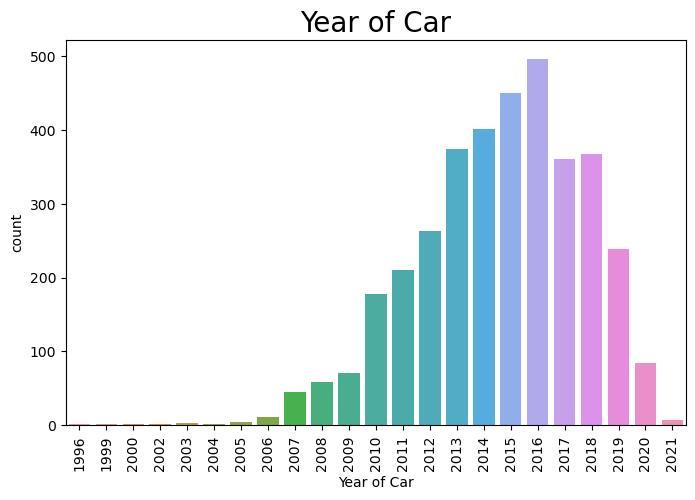

In [38]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Year of Car")
plt.xticks(rotation=90)
plt.title("Year of Car", fontsize = 20)

According to above diagram the maximum cars belongs to 2016 its means the cars which made nearby 2016(2015 to 2018 ) are in highly demand.

Text(0.5, 1.0, 'Make of Car')

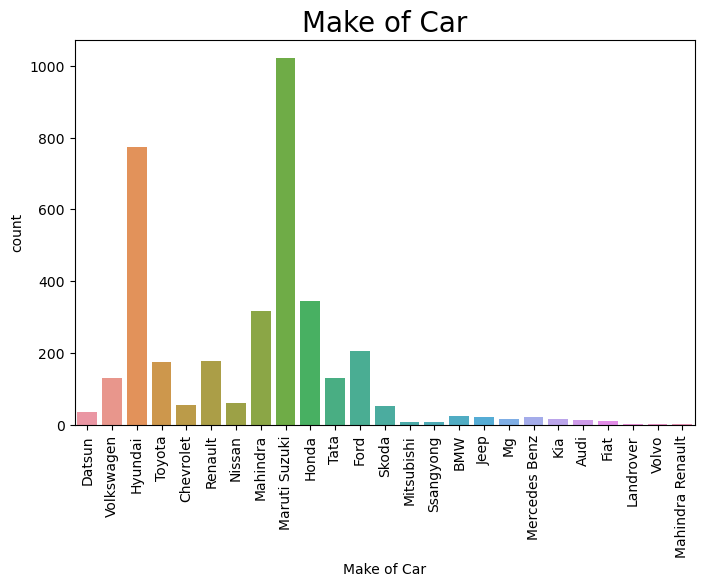

In [39]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Make of Car")
plt.xticks(rotation=90)
plt.title("Make of Car", fontsize = 20)

Accroding to the above diagram the Maruti Suzuki and Hyundai are the only Manufacturer who are highly in demand. Mahindra and Honda are also but very less from them. There are others company also but those are very less in demand.

Text(0.5, 1.0, 'Location of Car')

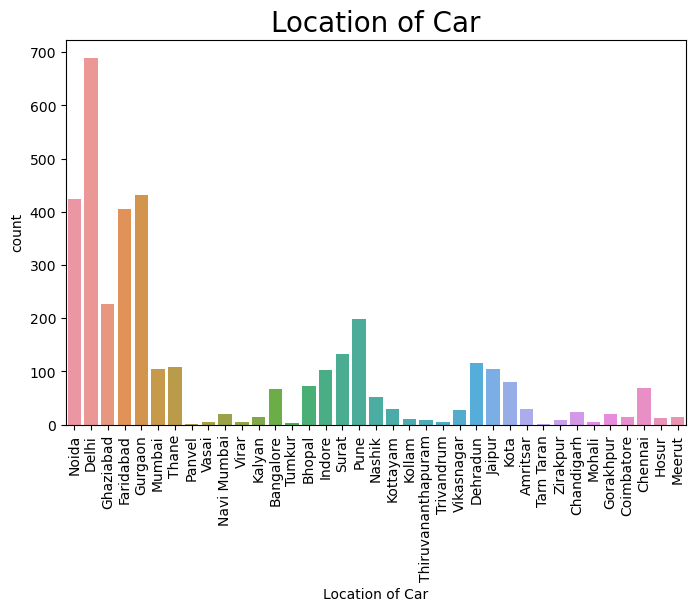

In [40]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Location of Car")
plt.xticks(rotation=90)
plt.title("Location of Car", fontsize = 20)

As we know the Delhi is metropolitan city this is the main reason the maximum Cars belongs to Delhi and also in Demand. 

The Second highest is Gurgaon and Third highest are Noida/Fridabad.

Gurgaon, Noida and Fridabad they all are border areas of Delhi so this is also reason of high Sale/Purchase of Cars.

Text(0.5, 1.0, 'Diseal/Petrol')

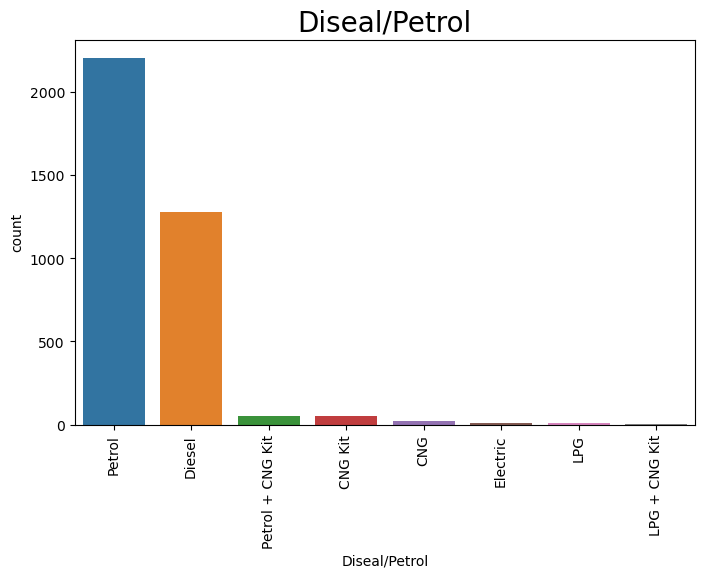

In [41]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Diseal/Petrol")
plt.xticks(rotation=90)
plt.title("Diseal/Petrol", fontsize = 20)

The maximum cars are in Petrol variant and Diesel is second highest.

Text(0.5, 1.0, 'Body')

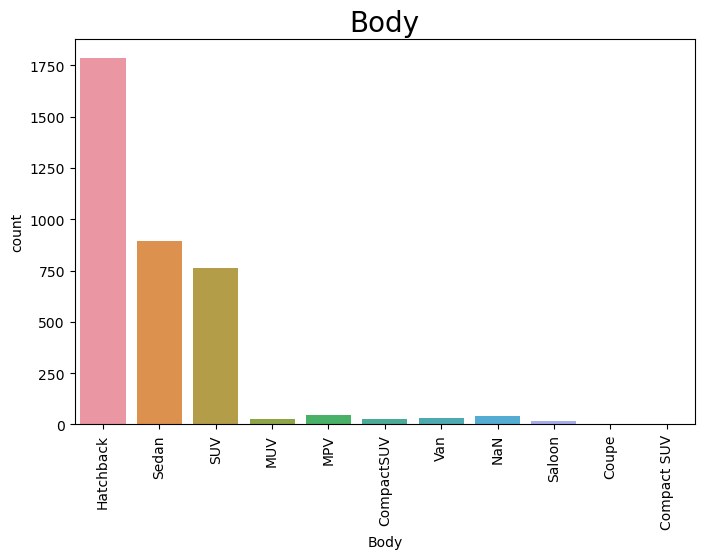

In [42]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Body")
plt.xticks(rotation=90)
plt.title("Body", fontsize = 20)

According to datasets the Hatchback Cars are highly counted. The Sedan and SUV are the second highest counted.

Text(0.5, 1.0, 'Owner')

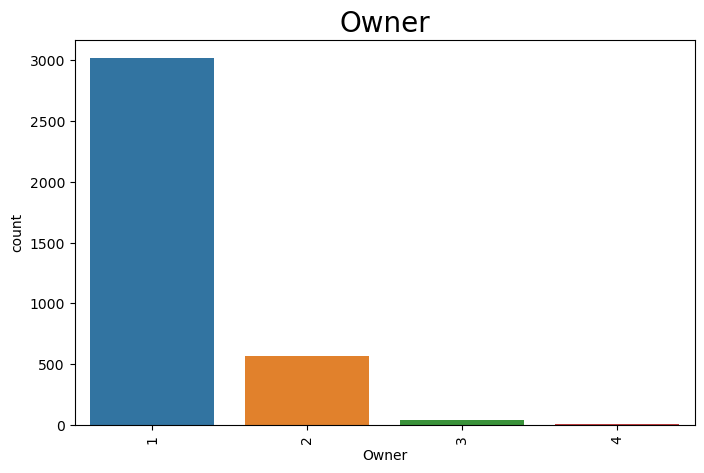

In [43]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Owner")
plt.xticks(rotation=90)
plt.title("Owner", fontsize = 20)

Maximum Cars belongs to first owner.

In [44]:
df.columns

Index(['Year of Car', 'Make of Car', 'Model', 'Price of Car',
       'Location of Car', 'Kilometers', 'Diseal/Petrol', 'Body', 'Owner'],
      dtype='object')

<AxesSubplot:xlabel='Year of Car', ylabel='count'>

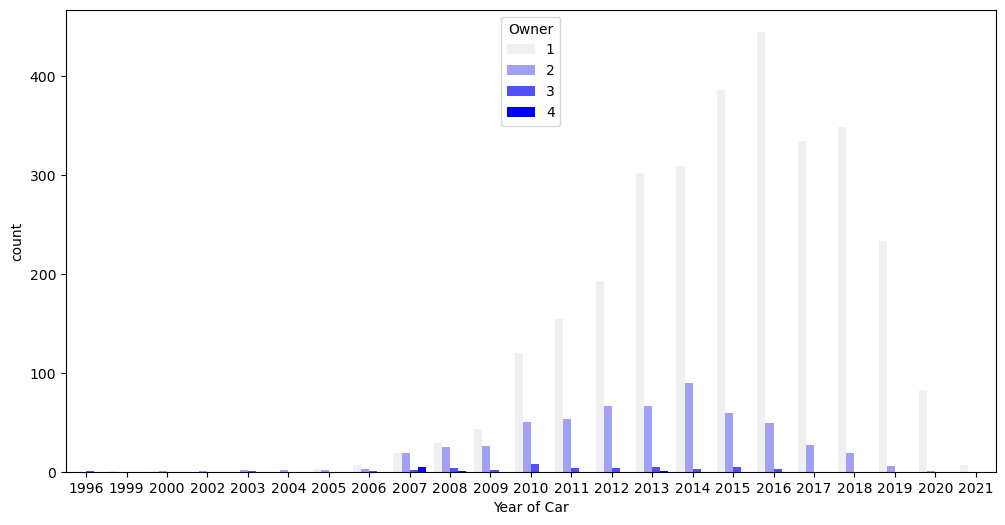

In [45]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Year of Car' , hue = 'Owner' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Here we are trying to compare Year of cars with Ownership. As we are getting from above maximum cars belongs to nearby 2016 and all are first owner cars.

In [46]:
df.head(20)

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,2016,Datsun,Go T,3 L,Noida,18000,Petrol,Hatchback,1
1,2012,Volkswagen,Polo COMFORTLINE 1.2...,3 L,Delhi,77366,Diesel,Hatchback,1
2,2012,Hyundai,I10 MAGNA 1.1 IRDE2,3 L,Ghaziabad,55343,Petrol,Hatchback,1
3,2014,Toyota,Etios Liva V,3 L,Faridabad,80530,Diesel,Hatchback,1
4,2011,Chevrolet,Cruze LT,3 L,Delhi,55982,Diesel,Sedan,2
5,2012,Renault,Duster RXL DIESEL 11...,2 L,Faridabad,85000,Diesel,SUV,2
6,2012,Nissan,Sunny XV DIESEL,2 L,Faridabad,1.37,Diesel,SUV,2
7,2013,Renault,Duster 85 PS RXE DIE...,3.2,Delhi,93000,Diesel,SUV,1
8,2016,Mahindra,Kuv100(2016_2017) K2...,3.3,Faridabad,60200,Diesel,SUV,1
9,2015,Renault,Duster 85 PS DSL RXZ,3.5,Delhi,85000,Diesel,SUV,1


In [47]:
df.dtypes

Year of Car         int64
Make of Car        object
Model              object
Price of Car       object
Location of Car    object
Kilometers         object
Diseal/Petrol      object
Body               object
Owner               int64
dtype: object

In [48]:
df2=df

In [49]:
df2['Kilometers'] = df2['Kilometers'].str[0:-1]

In [50]:
df2['Kilometers'] = df2['Kilometers'].str[0:-1]

In [51]:
#df2['Kilometers'] = df2['Kilometers'].str[0:-1]

In [52]:
df2.head(10)

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,2016,Datsun,Go T,3 L,Noida,180,Petrol,Hatchback,1
1,2012,Volkswagen,Polo COMFORTLINE 1.2...,3 L,Delhi,773,Diesel,Hatchback,1
2,2012,Hyundai,I10 MAGNA 1.1 IRDE2,3 L,Ghaziabad,553,Petrol,Hatchback,1
3,2014,Toyota,Etios Liva V,3 L,Faridabad,805,Diesel,Hatchback,1
4,2011,Chevrolet,Cruze LT,3 L,Delhi,559,Diesel,Sedan,2
5,2012,Renault,Duster RXL DIESEL 11...,2 L,Faridabad,850,Diesel,SUV,2
6,2012,Nissan,Sunny XV DIESEL,2 L,Faridabad,1.3,Diesel,SUV,2
7,2013,Renault,Duster 85 PS RXE DIE...,3.2,Delhi,930,Diesel,SUV,1
8,2016,Mahindra,Kuv100(2016_2017) K2...,3.3,Faridabad,602,Diesel,SUV,1
9,2015,Renault,Duster 85 PS DSL RXZ,3.5,Delhi,850,Diesel,SUV,1


# Data Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder
encoded = ['Year of Car', 'Make of Car', 'Model', 'Price of Car', 'Location of Car', 'Kilometers', 'Diseal/Petrol',
       'Body', 'Owner']

encoders = {column: LabelEncoder() for column in encoded}

for column in encoded:
    df[column] = encoders[column].fit_transform(df[column])

In [54]:
df

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,17,3,415,53,24,64,6,3,0
1,13,23,627,53,7,578,2,3,0
2,13,7,457,53,9,385,6,3,0
3,15,22,366,53,8,604,2,3,0
4,12,2,254,53,7,391,2,9,1
...,...,...,...,...,...,...,...,...,...
3630,20,11,733,16,19,198,2,7,0
3631,17,11,731,141,19,341,2,7,2
3632,19,7,312,92,19,313,6,3,0
3633,18,18,560,35,19,382,6,3,1


In [55]:
df.dtypes

Year of Car        int64
Make of Car        int32
Model              int32
Price of Car       int32
Location of Car    int32
Kilometers         int32
Diseal/Petrol      int32
Body               int32
Owner              int64
dtype: object

# Statistical Summary

In [56]:
df.describe()

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
count,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000
mean,15.612105,11.457221,486.045942,69.509216,13.710041,345.316094,4.480880,5.441265,0.185420
std,3.077027,5.575422,293.201092,36.126316,8.396647,201.351501,1.995139,2.637324,0.431629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,7.000000,238.500000,37.000000,7.000000,181.500000,2.000000,3.000000,0.000000
50%,16.000000,11.000000,458.000000,74.000000,11.000000,351.000000,6.000000,4.000000,0.000000
75%,18.000000,13.000000,751.000000,96.000000,24.000000,508.500000,6.000000,9.000000,0.000000
max,22.000000,24.000000,1016.000000,149.000000,36.000000,736.000000,7.000000,10.000000,3.000000


Statistical Summary provide information about whole data statistically i.e. Count, Mean, Standard Deviation, Minimum value, 25%, 50% 75% and Maximum Value and statistical report is mentioned above.

<AxesSubplot:>

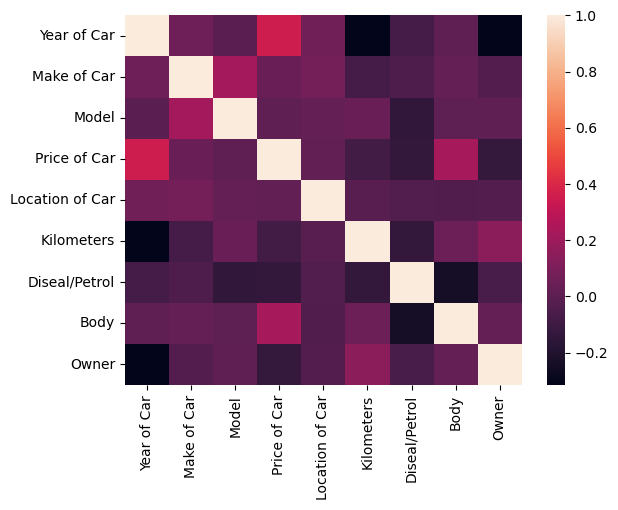

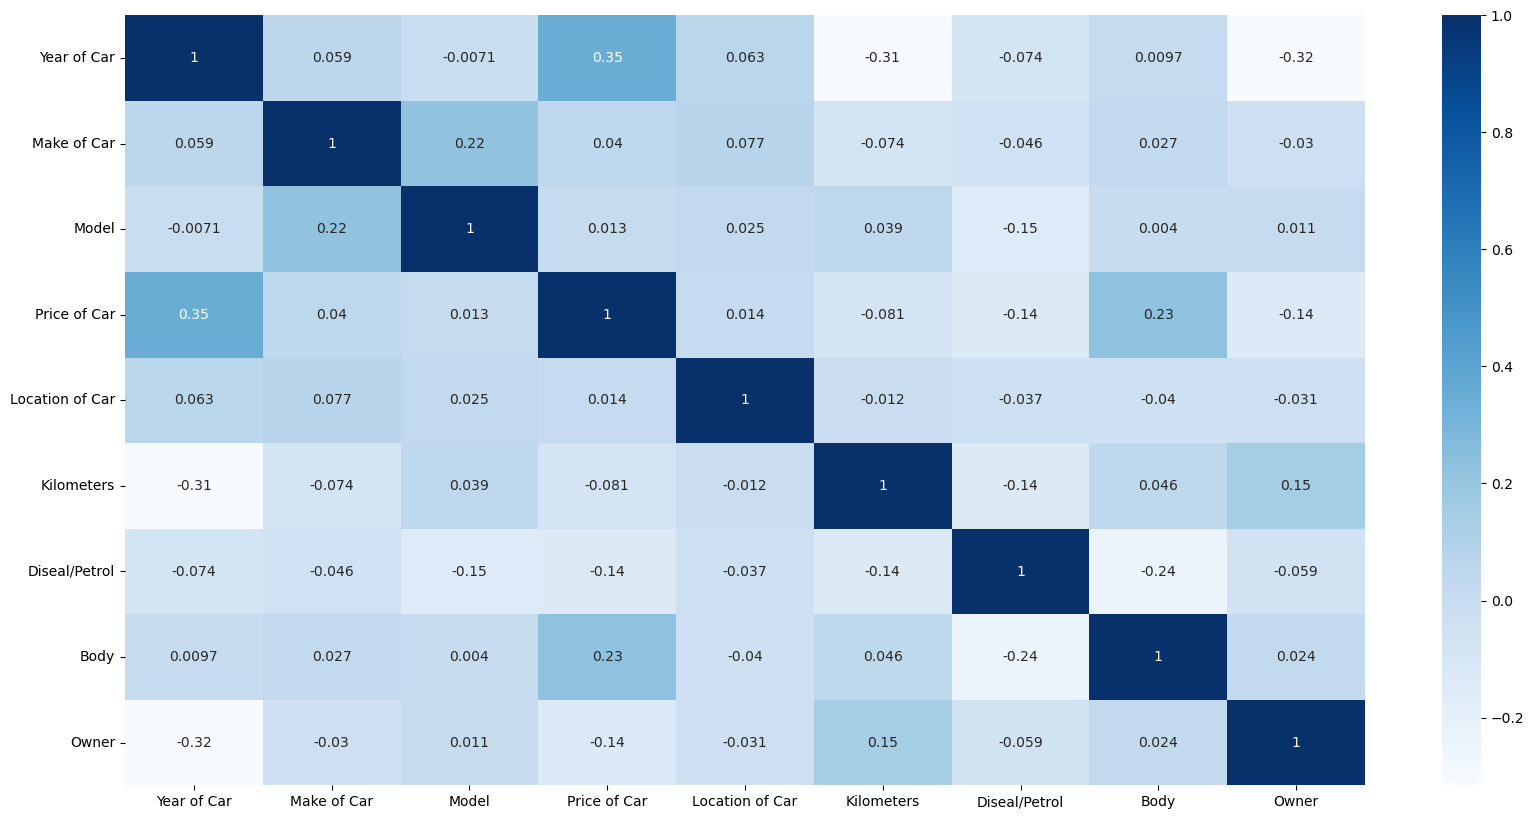

In [57]:
datacor=df.corr()
datacor
sns.heatmap(datacor)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(datacor,cmap='Blues',annot=True)

# Removing Outliers from Data

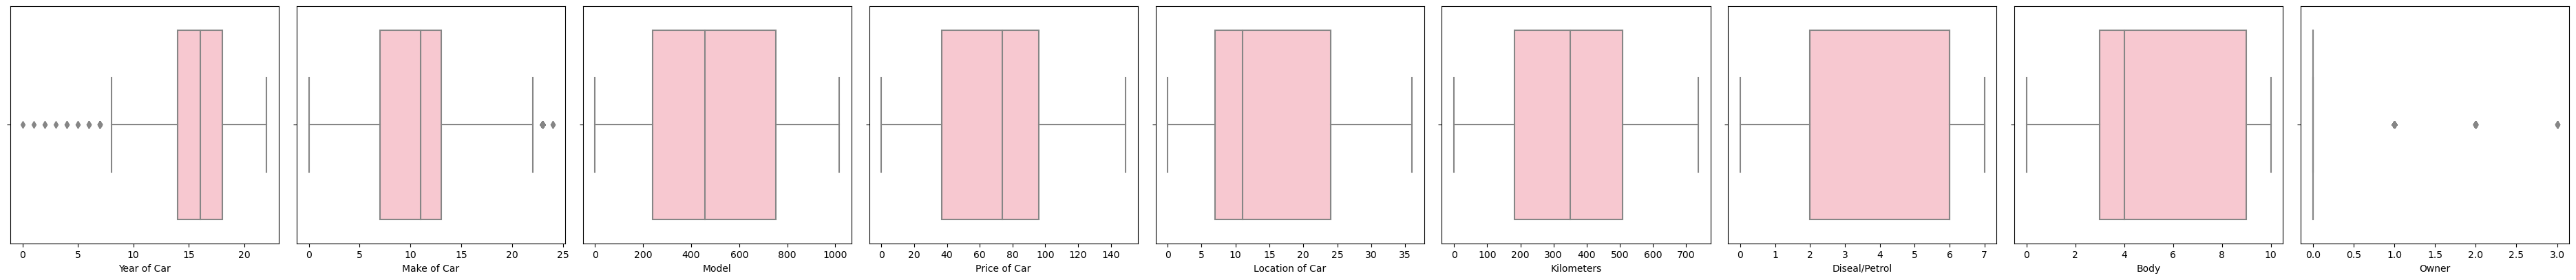

In [58]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(50,40))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Pink', orient='v')
    plt.tight_layout()

# Zscore Method

In [59]:
from scipy.stats import zscore

In [60]:
z=np.abs(zscore(df))
z

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,0.451113,1.517084,0.242345,0.457049,1.225653,1.397332,0.761515,0.925787,0.429640
1,0.849022,2.070582,0.480808,0.457049,0.799243,1.155769,1.243634,0.925787,0.429640
2,0.849022,0.799551,0.099079,0.457049,0.561020,0.197115,0.761515,0.925787,0.429640
3,0.198955,1.891198,0.409488,0.457049,0.680132,1.284915,1.243634,0.925787,0.429640
4,1.174056,1.696468,0.791531,0.457049,0.799243,0.226918,1.243634,1.349559,1.887483
...,...,...,...,...,...,...,...,...,...
3630,1.426214,0.082018,0.842384,1.481374,0.630095,0.731737,1.243634,0.591110,0.429640
3631,0.451113,0.082018,0.835562,1.979184,0.630095,0.021439,1.243634,0.591110,4.204607
3632,1.101180,0.799551,0.593688,0.622645,0.630095,0.160518,0.761515,0.925787,0.429640
3633,0.776146,1.173665,0.252265,0.955369,0.630095,0.182213,0.761515,0.925787,1.887483


Applying Zscore functionality on entire data to remove outliers.

In [61]:
threshold=3
print(np.where(z>3))

(array([ 774, 1091, 1107, 1152, 1171, 1227, 1230, 1231, 1251, 1252, 1439,
       1502, 1505, 1509, 1563, 1566, 1567, 1568, 1574, 1585, 1609, 1628,
       1667, 1668, 1674, 1677, 1965, 1997, 2008, 2066, 2085, 2088, 2128,
       2167, 2173, 2191, 2197, 2220, 2245, 2246, 2410, 2427, 2429, 2443,
       2459, 2462, 2468, 2473, 2474, 2850, 3167, 3183, 3228, 3247, 3303,
       3306, 3307, 3327, 3328, 3536, 3536, 3537, 3537, 3631, 3634],
      dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 0, 8, 0, 0, 0, 8, 8, 0, 8,
       0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 8, 8, 8, 8, 0, 0, 8, 8, 8, 8,
       8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 0, 8, 8, 8],
      dtype=int64))


Putting threshold Value

In [62]:
df_new=df[(z<3).all(axis=1)]
df_new

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,17,3,415,53,24,64,6,3,0
1,13,23,627,53,7,578,2,3,0
2,13,7,457,53,9,385,6,3,0
3,15,22,366,53,8,604,2,3,0
4,12,2,254,53,7,391,2,9,1
...,...,...,...,...,...,...,...,...,...
3628,20,11,734,16,19,708,2,7,0
3629,19,11,577,97,19,90,2,4,0
3630,20,11,733,16,19,198,2,7,0
3632,19,7,312,92,19,313,6,3,0


After Removing outliers know we have clean data.

In [63]:
#Checking shape of date after applying Zscore method. 
df.shape,df_new.shape

((3635, 9), (3572, 9))

In [64]:
(63/3635)*100

1.733149931224209

Here we are loosing 2% approx data after applying Zscore Method but its ok it is not much data.

# Checking Skewness of all Features.

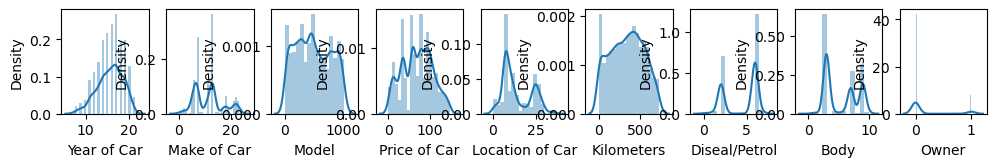

In [65]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol, i+1)
    sns.distplot(df_new[collist[i]])

In [66]:
df_new.skew()

Year of Car       -0.400701
Make of Car        0.495353
Model              0.122977
Price of Car      -0.007254
Location of Car    0.597088
Kilometers        -0.026570
Diseal/Petrol     -0.542755
Body               0.265403
Owner              1.891697
dtype: float64

In [67]:
df.head()

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,17,3,415,53,24,64,6,3,0
1,13,23,627,53,7,578,2,3,0
2,13,7,457,53,9,385,6,3,0
3,15,22,366,53,8,604,2,3,0
4,12,2,254,53,7,391,2,9,1


# Spliting the Independent and Target Variable

In [68]:
x=df.drop('Price of Car',axis=1)
y=df['Price of Car']

In [69]:
print(x.shape,y.shape)

(3635, 8) (3635,)


# Data Scaling

In [70]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dx=sc.fit_transform(x)
dx=pd.DataFrame(dx,columns=x.columns)
dx

,Year of Car,Make of Car,Model,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,0.772727,0.125000,0.408465,0.666667,0.086957,0.857143,0.3,0.000000
1,0.590909,0.958333,0.617126,0.194444,0.785326,0.285714,0.3,0.000000
2,0.590909,0.291667,0.449803,0.250000,0.523098,0.857143,0.3,0.000000
3,0.681818,0.916667,0.360236,0.222222,0.820652,0.285714,0.3,0.000000
4,0.545455,0.083333,0.250000,0.194444,0.531250,0.285714,0.9,0.333333
...,...,...,...,...,...,...,...,...
3630,0.909091,0.458333,0.721457,0.527778,0.269022,0.285714,0.7,0.000000
3631,0.772727,0.458333,0.719488,0.527778,0.463315,0.285714,0.7,0.666667
3632,0.863636,0.291667,0.307087,0.527778,0.425272,0.857143,0.3,0.000000
3633,0.818182,0.750000,0.551181,0.527778,0.519022,0.857143,0.3,0.333333


In [71]:
X=dx

# Feature Selection

In [72]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

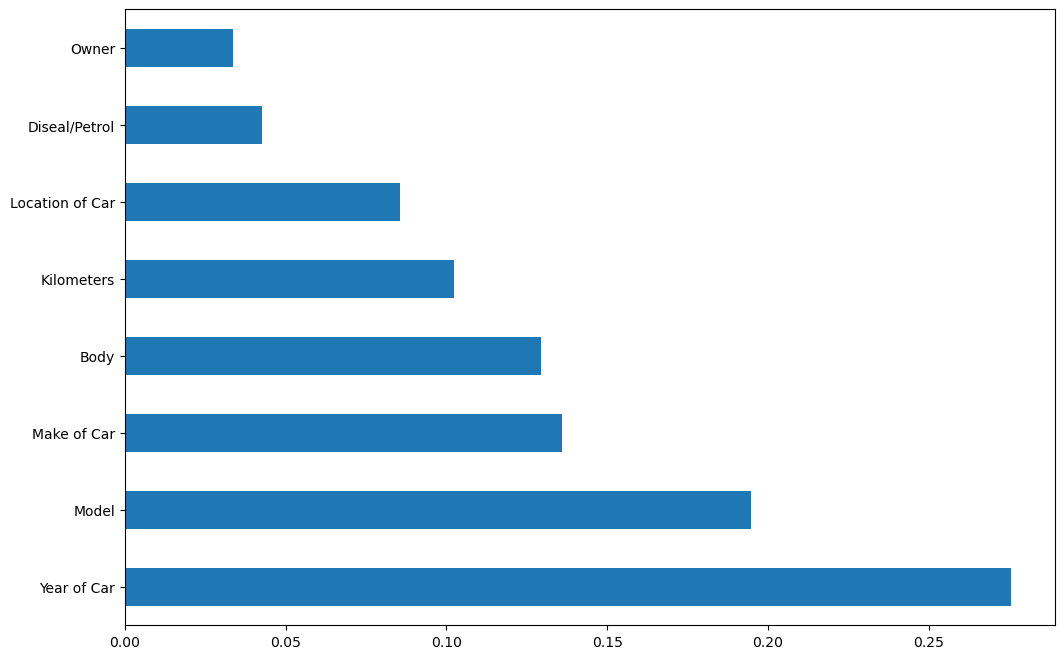

In [73]:
plt.figure(figsize = (12,8))
feat_importances=pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

As we have seen the all features are important, so we will use all features for model building.

# Finding best Random State for train test split.

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .30, random_state = i)
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predf = LR.predict(X_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.24732088726106205  on Random State  247


In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=670)

In [76]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(2544, 8) (2544,) (1091, 8) (1091,)


# LinearRegression

In [77]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [78]:
LR.coef_

array([ 77.73051455,   3.03960919,  -0.73401716,  -1.91732441,
        -0.11298611,  -8.04658151,  26.72721852, -12.72232957])

In [79]:
LR.score(X_train,y_train)

0.15875668666645026

In [80]:
pred=LR.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [96.45184683 54.60900196 73.28801938 ... 40.91489026 65.58401622
 66.32449824]
error:
Mean absolute error: 24.527921769845218
Mean squared error: 995.4533490738683
Root Mean Squared error: 31.550805838739972
0.21816819685775002


# Random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
predrf=rf.predict(X_test)
print('Predicted Result Price:',predrf)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,predrf)))
print(r2_score(y_test,predrf))

Predicted Result Price: [104.5   66.4  102.47 ...  24.5   95.97  87.61]
error:
Mean absolute error: 10.167386786550857
Mean squared error: 349.75594009257935
Root Mean Squared error: 18.701763020971562
0.7253007209662795


# Decision Tree Regressor

In [82]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
pred=dtc.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [129.  71. 103. ...   6.  99.  90.]
error:
Mean absolute error: 9.888328750381913
Mean squared error: 613.8321875954782
Root Mean Squared error: 24.77563697658404
0.5178945085663553


# Ada Boost Regressor

In [83]:
from sklearn.ensemble import AdaBoostRegressor
ad=RandomForestRegressor(n_estimators=100)
ad.fit(X_train,y_train)
ad.score(X_train,y_train)
pred=ad.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [104.7   62.83 102.52 ...  24.21  94.11  85.81]
error:
Mean absolute error: 10.262925865304876
Mean squared error: 358.6073293845482
Root Mean Squared error: 18.936930305214418
0.7183488154280718


# KNeighbors Regressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
pred=knn.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [114.6  57.4 111.  ...   6.2  93.   88.4]
error:
Mean absolute error: 20.918423464711275
Mean squared error: 879.348267644363
Root Mean Squared error: 29.653806967139364
0.3093574477176332


# Cross Validation

We are Cross validating the models to see thre are underfitting or overfitting present or not.

In [85]:
from sklearn.model_selection import cross_val_score
LR=cross_val_score(LR,X,y,cv=5)
print("Cross Validation Score of Linear Regression Model:", LR.mean())

Cross Validation Score of Linear Regression Model: 0.137924369033811


In [86]:
RFR=cross_val_score(rf,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", RFR.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.7199134445971087


In [87]:
DTC=cross_val_score(dtc,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", DTC.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.6175411425639368


In [88]:
AD=cross_val_score(ad,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", AD.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.7159966925105729


In [89]:
KNN=cross_val_score(knn,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", KNN.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.2918217012094131


# Hyperparameter tuning

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42)
parameters = {'bootstrap': [True],'criterion': ['mse'],'max_depth':[None],'n_estimators':[10], 'random_state':[42]}

grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.6039649968318778
Residual sum of squares: 394.61


# Prediction

In [91]:
import numpy as np
a = np.array(y_test)
predicted = np.array(predrf)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,111,104.50
1,53,66.40
2,103,102.47
3,19,21.80
4,110,107.25
...,...,...
1086,7,6.97
1087,97,96.80
1088,9,24.50
1089,99,95.97


# Predicted Model PLot

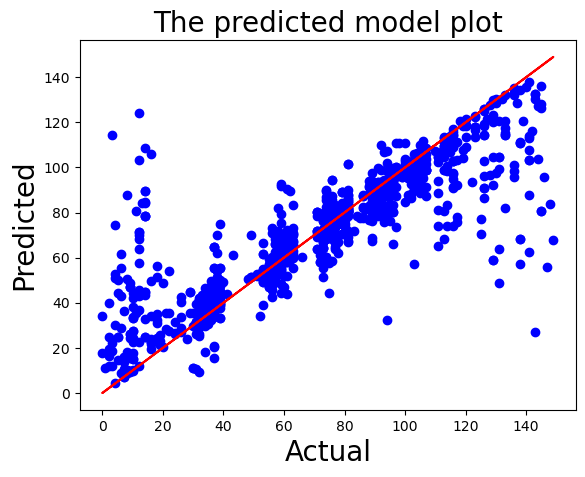

In [92]:
plt.scatter(x=y_test, y=predrf, color = "blue")
plt.plot(y_test,y_test, color='r')
plt.xlabel("Actual", fontsize =20)
plt.ylabel("Predicted", fontsize=20)
plt.title("The predicted model plot", fontsize=20)
plt.show()

# Saving Model

In [94]:
import joblib
joblib.dump(rf,'CAR_PRICE_MODEL_23.obj')

['CAR_PRICE_MODEL_23.obj']